# The Hamiltonian

Reference: [Jeremy Rath et al 2022 ApJ 932 61](https://iopscience.iop.org/article/10.3847/1538-4357/ac5f57/meta)

The Hamiltonian of our system is
$$H(\phi,p,t) = \frac{p^2}{2} - \epsilon_1\cos{(\phi)} - \epsilon_2\cos{(r(\phi-\nu t))}.$$
The corresponding Hamilton equations of motions are
$$\dot{\phi} = \frac{\partial H}{\partial p} = p,$$
and
$$\dot{p} = -\frac{\partial H}{\partial \phi} = -\epsilon_1 \sin{(\phi)} - r\epsilon_2\sin{(r(\phi-\nu t))}.$$

# Solve and Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def wrapRad(theta):
    return (theta + np.pi) % (2*np.pi) - np.pi

We solve for $\phi(t)$ and $p(t)$ numerically. Then we sample at times $t$, such that $r\nu t = 2k\pi$ ($k\in\mathbb{Z}^+$), and create a phase-space plot.

In [3]:
def hamilton(y,t,e1,e2,r,nu):
    phi, p = y
    dydt = [p, -e1*np.sin(phi) - r*e2*np.sin(r*(phi-nu*t))]
    return dydt

In [17]:
# solve and plot
def phasePlot(e1, e2, r, nu, ic):
    num = 201  # number of sampled time
    t = np.linspace(0,num-1,num)*2*np.pi/(r*nu)
    
    plt.rcParams["figure.figsize"] = (7,7)
    for y0 in ic:
        sol = odeint(hamilton, y0, t, args=(e1,e2,r,nu))
        phi = [wrapRad(x) for x in sol[:,0]]
        plt.plot(phi, sol[:,1], 'k.', ms=0.2)
    plt.xlabel(r'$\phi$')
    plt.ylabel(r'$p$')
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
#     plt.title(fr'phase-space plot for $\nu={nu}$')
    plt.show()

For $\epsilon_1=1, \epsilon_2=0.1, r=1,$ and $\nu=10$,

In [23]:
# create different initial conditions
ic = [[x,y] for x in np.linspace(-np.pi, np.pi, 8) for y in np.linspace(-2, 10, 20)]

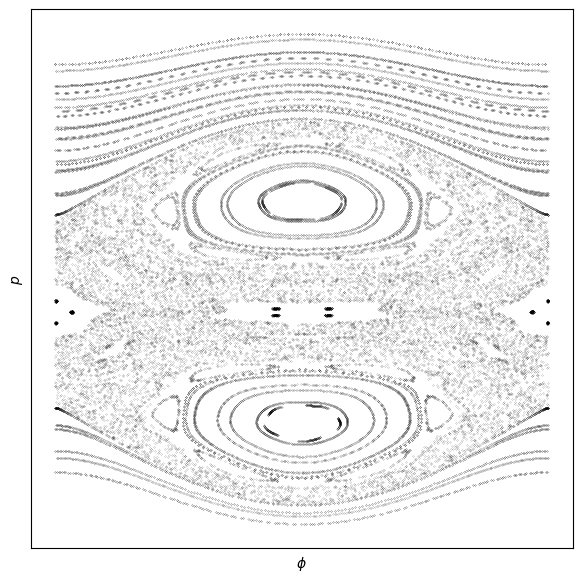

In [28]:
phasePlot(2, 2, 1, 7, ic)

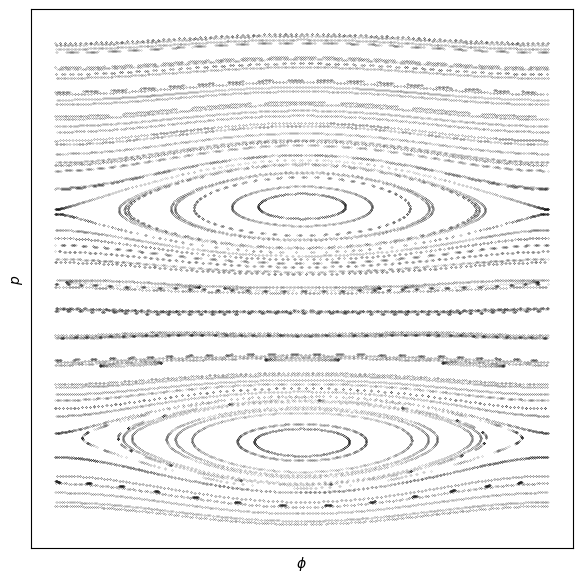

In [30]:
phasePlot(0.5, 0.5, 1, 7, ic)

Now we try for smaller $\nu$ values.

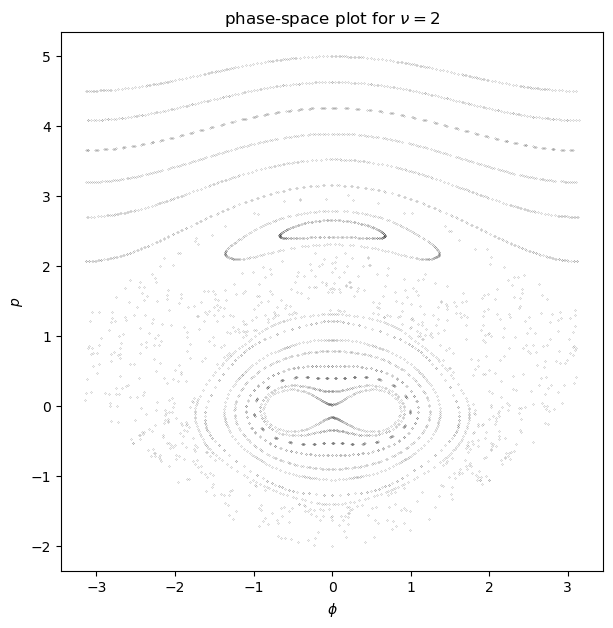

In [7]:
ic = [[0,y] for y in np.linspace(-2, 5, 20)]
phasePlot(1, 0.1, 1, 2, ic)

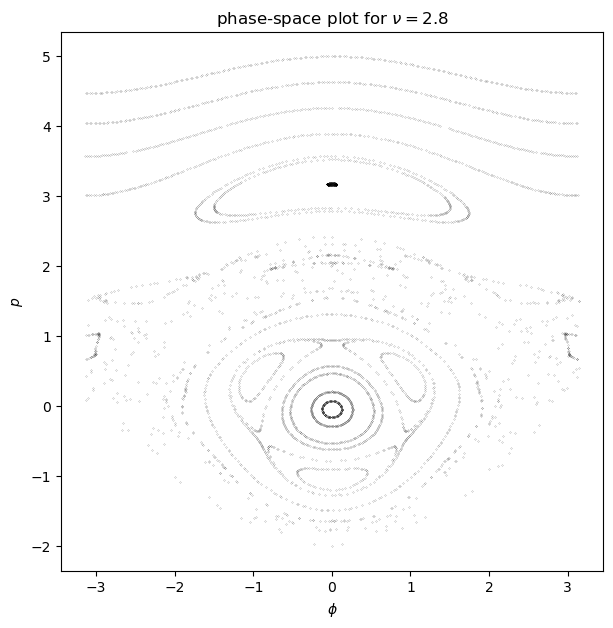

In [8]:
phasePlot(1, 0.1, 1, 2.8, ic)

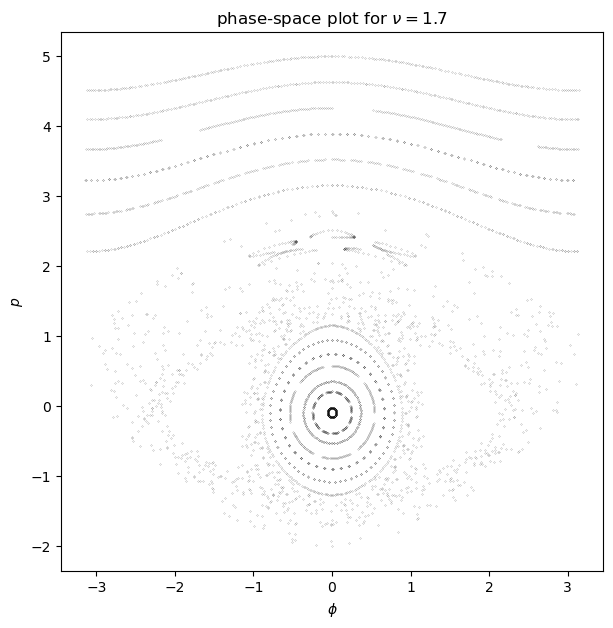

In [9]:
phasePlot(1, 0.1, 1, 1.7, ic)

# Rescaling

If we want to choose a value of $\nu$ different from the paper, we can rescale $\epsilon_1$, and $\epsilon_2$ as
$$\epsilon_1 = \left(\frac{\nu}{\nu_0}\right)^2, \qquad
\epsilon_2 = 0.1\left(\frac{\nu}{\nu_0}\right)^2,$$
where $\nu_0$ is the value used in the paper. Then we will get the same graph of surface of section.

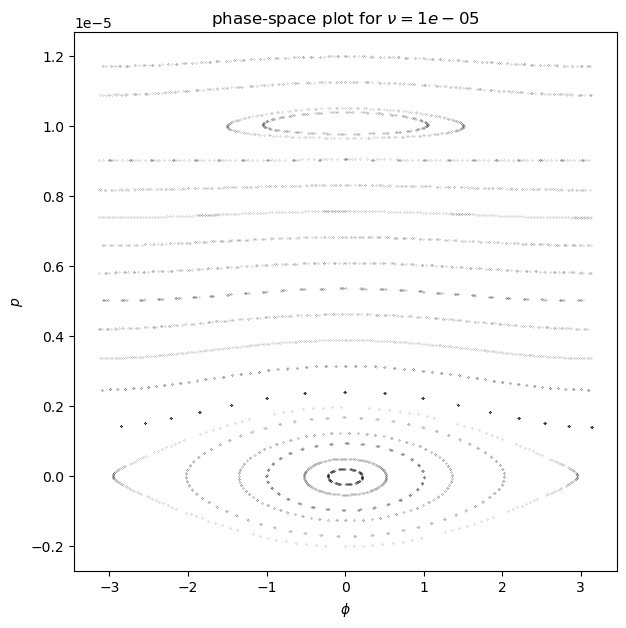

In [10]:
nu_0, nu = 10, 1e-5   # let's make nu 1e5 times smaller
epsilon1, epsilon2 = (nu/nu_0)**2, 0.1*(nu/nu_0)**2   # calculate the rescaled epsilon values

ic = [[0,y] for y in np.linspace(-0.2*nu,1.2*nu,20)]  # rescale the ICs
phasePlot(epsilon1,epsilon2,1,nu, ic)